# Hloubkové senzory - měření objektů
Cvičení je zaměřené na práci s [hloubkovými mapami](https://en.wikipedia.org/wiki/Depth_map) vzniklých použitím tzv. hloubkových senzorů. V laboratoři jsou k dispozici hloubkové senzory založené na několika principech zisku hloubkových map. Jedná se o kamery typu Kinect, RealSense nebo Time-of-Flight (ToF). Souhrně se často označují jako RGBD kamery, kde k standardní barevné informaci RGB přibyde informace hloubková "D" (depth).

Vytvořit stereokameru lze i pomocí dvou obyčejných kamer. Podrobný návod pro zájemce je k dispozici na příklad [zde](https://erget.wordpress.com/2014/02/01/calibrating-a-stereo-camera-with-opencv/).


---

## Typy systémů
<table>
    <tr>
        <th align="left" width="16%"><a href="https://en.wikipedia.org/wiki/Kinect">Microsoft Kinect</a></th>
        <th align="left" width="16%"><img src="images/kinect.png" width="50%"/></th>
        <th align="left" width="16%"><a href="https://en.wikipedia.org/wiki/Intel_RealSense">Intel RealSense</a></th>
        <th align="left" width="16%"><img src="images/realsense.png" width="50%"/></th>
        <th align="left" width="16%"><a href="https://en.wikipedia.org/wiki/Time-of-flight_camera">Basler ToF</a></th>
        <th align="left" width="16%"><img src="images/tof.png" width="50%"/></th>       
    </tr>
    <tr>
        <td align="left" colspan="2">Postaven na principu promítání laserového vzoru a měření jeho deformace infračervenou kamerou.</td>
        <td align="left" colspan="2">Využívá stejného principu jako Kinect, pouze má jiný vzor.</td>
        <td align="left" colspan="2">Využívá promítání světla z více LED zdrojů a měří čas jeho návratu (odrazu).</td>
    </tr>
    <tr>
        <td align="left" colspan="2">Je náchylný na měření venku. Denní světlo kazí obraz.</td>
        <td align="left" colspan="2">Měl by být vhodný i pro měření venku.</td>
        <td align="left" colspan="2">Je náchylný na měření venku. Denní světlo kazí obraz.</td>
    </tr>
    <tr>
        <td align="left" colspan="2">Více Kinectů vedle sebe si vzájemně kazí vzory.</td>
        <td align="left" colspan="2">Nejnovější a nejmenší senzor na trhu.</td>
        <td align="left" colspan="2">Průmyslová konstrukce pro běh 24/7.</td>
    </tr>
</table>

---

## Využití

Kromě zjevného využití RGBD kamer k měření vzdálenosti objektu od senzoru (např. precizní robotická manipulace, 3D skeny, výpočet objemu součástky) jsou kamery užitečné i pro robustnější detekce a klasifikace objektů.

**Příklad:**

Obrázek vlevo nasnímaný RGBD kamerou představuje naměřenou hloubku pomocí barevné škály.
Nelze však jednoduše určit, zda se jedná o jablko nebo pomeranč. Je potřeba použít dodatečnou barevnou informaci.

Naopak samotná 2D kamera by nebyla schopna rozpoznat rozdíl mezi plochou nálepkou ovoce a skutečným hmotným ovocem.

To umožňuje např. detekovat hloubku jablka ve stromu a zároveň jeho zralost dle barvy.

Hloubková informace v synergii s tou barevnou tak poskytuje nové souvislosti v obrazových datech a umožňuje pokročilejší analýzy, nikoliv jen měření vzdáleností.

<img src="images/tof_advantage_showcase.png" alt="RGBD" width="600"/>

---

## Úkol
Cílem cvičení je využít hloubkovou mapu ze senzoru **Basler ToF** pro detekci zkoumaného objektu - zavěšené dřevěné koule mimikující jablko. Dále je potřeba vyfiltrovat dřevěnou krychli, kterou měřit nechceme a výstup vhodně vizualizovat.

Úloha je inspirovaná řešením z aplikovaného výzkumu samosběrného robota [[1]](https://robomechjournal.springeropen.com/articles/10.1186/s40648-022-00230-y):

<table>
    <tr>
        <td><img src="images/fruit_picking_robot.png" alt="Fruit picking robot" height="260"/></td>
        <td><img src="images/pears_3D.png" alt="Pears 3D" height="260"/></td>
        <td><img src="images/robot_action.png" alt="Robot in action" height="260"/></td>
    </tr>
</table>


---

### Import knihoven a konfigurace

In [1]:
import os
import io
import builtins


import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

from improutils import *

%matplotlib inline
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

---

#### 1) Nasnímejte data hloubkovou kamerou Basler ToF

Pro práci s hloubkovou kamerou využijte software Basler ToF Viewer. Kameru připojte k PC, nasnímejte zkoumaný objekt a výstup uložte. Typ souboru při ukládání vyberte jako "Points intensity" (končí příponou points-intensity.pcd).

Dbejte na to, aby při pořizování dat byla kamera **nastavena rovnoběžně s pozadím**, a to bez rušivých elementů v záběru, např. okraj monitoru apod. 

Usnadnit snímání Vám může nastavení "Maximum depth [mm]" v programu, který vyfiltruje vše, co je dále, než zvolený threshold.

---

#### 2) Načtěte data ve formátu point cloud `.pcd (text)` a z dat získejte hloubkovou mapu. Mapu zobrazte.


##### a) Zobrazte strukturu .pcd dat

In [2]:
filepath = "images/tof640-20gm-22731198-0013-points_intensity.pcd"
filepath = "images/tof640-20gm-22731198-0013-points_intensity.pcd"

with builtins.open(filepath, 'r') as f:  ### soubor s pcd daty
    pcd = f.readlines()

header = pcd[:11]
data = pcd[11:]

for line in header : # zobrazení hlavičky
    print(line)

for line in data : # zobrazení několika bodů
    print(line)
    break

# .PCD v0.7 - Point Cloud Data file format

VERSION 0.7

FIELDS x y z rgb

SIZE 4 4 4 4

TYPE F F F F

COUNT 1 1 1 1

WIDTH 640

HEIGHT 480

VIEWPOINT 0 0 0 0 -1 0 0

POINTS 307200

DATA ascii

nan nan nan 0



##### b) Převeďte .pcd data na hloubkovou mapu

Informace v hlavičce .pcd souboru vám mimo jiné prozradila, že data jsou ve formátu 4 float hodnot x, y, z, rgb. Při pořizování dat byla kamera nastavena rovnoběžně s pozadím, tudíž nás budou zajímat pouze **_z_** hodnoty -> hloubková mapa.

Souřadnice ```z = 0``` je dle výrobce na přední straně krytu kamery a od ní dále se měří vzdálenost. Pixely s nespolehlivými údaji o vzdálenosti (např. poblíž hran objektů) nebo pixely, které představují objekty v oblastech mimo ROI (vámi nastavená maximální hloubka), mají hodnotu NaN.

In [3]:
# Funkce pro převod .pcd dat do hloubkové mapy o velikosti height x width
def pcd_to_depth(pcd, height, width):
    data = pcd
    data = [float(x.split(' ')[2]) for x in data] # extrakce hloubkové hodnoty
    data = np.reshape(data, (height, width))
    return data

In [4]:
depths = pcd_to_depth(data, 480, 640)  ###

##### c) Normalizujte a zobrazte data
Pro využití automatické segmentace je třeba data převézt na typ uint8. Pro převedení dat do rozsahu [0, 255] je třeba použít normalizaci, OpenCV a improutils obsahují vhodnou funkci.

Normalizovaná data zobrazte pomocí čtyř různých [colormap](https://matplotlib.org/stable/users/explain/colors/colormaps.html), vhodných pro hloubková data.

In [5]:
def subplot_image(image, subplots=(2, 2), cmaps=['gray'], normalize=False, ticks_off=True, title_size=12):
    """
    Plots the same image in multiple subplots with different color maps.

    Parameters
    ----------
    image : ndarray
        Image to be shown.
    subplots : tuple
        Shape of the subplot grid (rows, columns).
    cmaps : list
        List of colormaps to be used for each subplot.
    normalize : bool
        If True, image will be normalized.
    ticks_off : bool
        If True, axis decorations will be hidden.
    title_size : int
        Size of the title.

    Returns
    -------
    None
    """
    rows, cols = subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))
    
    # Flatten axes array if it's 2D for easier iteration
    axes = axes.ravel()

    # Determine number of subplots and iterate
    num_subplots = min(len(axes), len(cmaps))
    for i in range(num_subplots):
        ax = axes[i]
        if ticks_off:
            ax.axis('off')

        # Set colormap and display the image
        cmap = cmaps[i] if i < len(cmaps) else 'gray'
        norm = Normalize() if normalize else NoNorm()
        
        ax.imshow(image, cmap=plt.get_cmap(cmap), norm=norm)
        ax.set_title(f'Cmap: {cmap}', fontsize=title_size)

    # Hide any unused subplots if there are fewer cmaps than grid cells
    for j in range(num_subplots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

##### c) Normalizujte a zobrazte data
Pro využití automatické segmentace je třeba data převézt na typ uint8. Pro převedení dat do rozsahu [0, 255] je třeba použít normalizaci, OpenCV a improutils obsahují vhodnou funkci.

Normalizovaná data zobrazte pomocí čtyř různých [colormap](https://matplotlib.org/stable/users/explain/colors/colormaps.html), vhodných pro hloubková data.

In [6]:
depths_normalized = normalize(depths)  ### normalizace dat

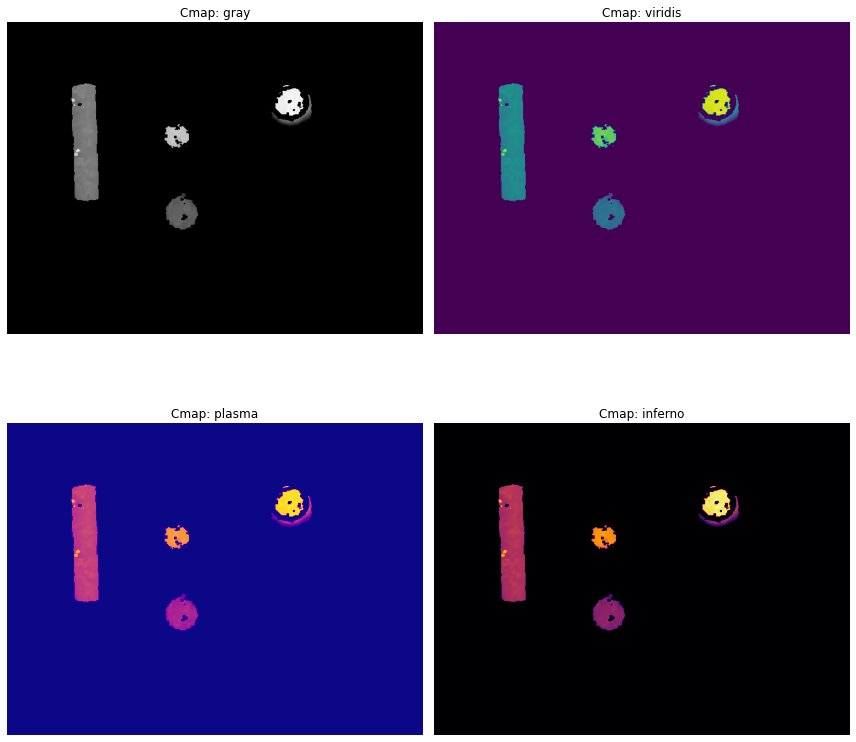

In [7]:
subplot_image(depths_normalized, subplots=(2, 2), cmaps=['gray', 'viridis', 'plasma', 'inferno']) ### zobrazení s různými colormapy

In [8]:
np.unique(depths_normalized)

array([  0,   2,   7,   8,   9,  10,  11,  12,  13,  14,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 147, 148, 149, 151, 158, 162, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
       207, 208, 210, 211, 212, 215, 216, 218, 21

#### 3) Segmentujte objekty
Při použití klasické segmentace není vhodné segmentovat normalizovaná data, jelikož by segmentace nebyla založena na reálných datech. Funkce pro automatické segmentování v improutils používá *Otsouvu metodu*, která u originálních a normalizovaných bude segmentovat stejně. 

Využijte **automatickou** segmentaci na **normalizovaných** datech a **manuální** pro **originální** i **normalizovaná** data. Výsledné 3 masky zobrazte.

Pro volbu vhodných hodnot při manuální segmentaci originálních hodnot si můžete pomoci např. matplotlib histogramem (pozor na NaN hodnoty) či podstatou, jaká data hloubková kamera zaznamenává.

Dále pracujte jen s nejlepším segmentace.

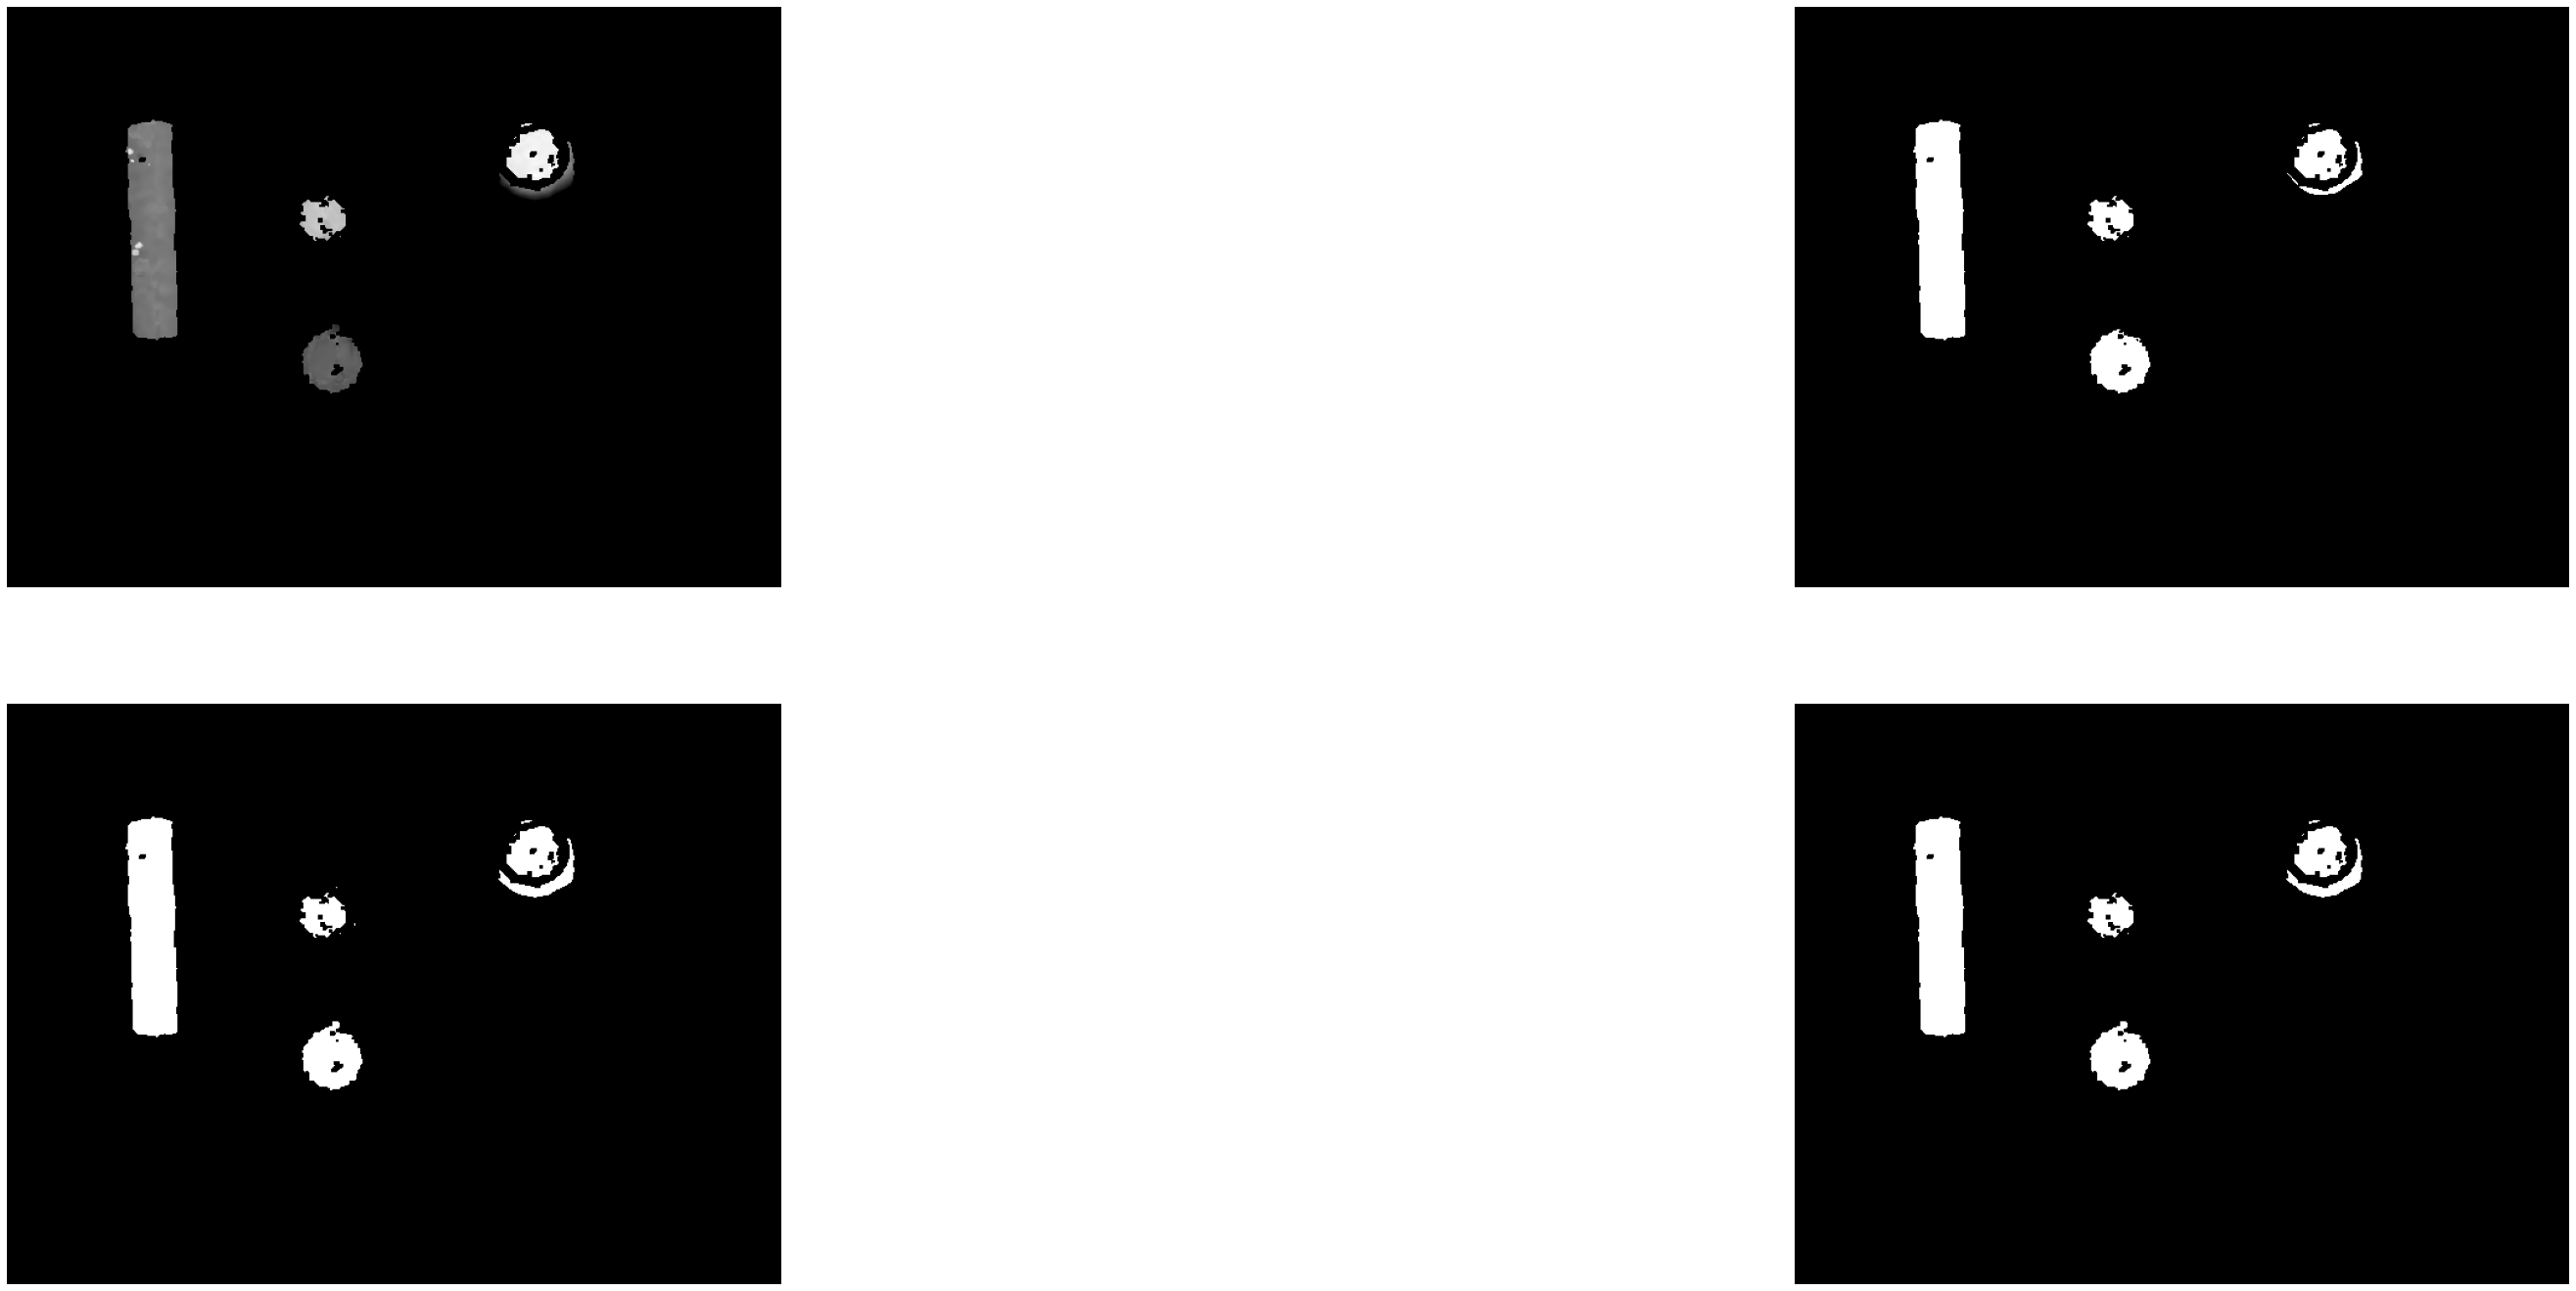

In [9]:
img_seg_auto = segmentation_auto_threshold(depths_normalized) ###
img_seg_org = segmentation_two_thresholds(depths, -800, 0) ###
img_seg_norm = segmentation_two_thresholds(depths_normalized, 10, 255) ###
plot_images(depths_normalized, img_seg_auto, img_seg_org, img_seg_norm)


---

#### 4) Získejte masku naměřených objektů

Pro měření objektů je třeba získat kontury objektů. Počet kontur by měl odpovídat počtu zavěšených objektů. Filtrací odstraníme nekruhové objekty a šum. 

Kontury vyfiltrujte minimální plochou a na základě jejich kulatosti.
Kulatost je definována vzorcem $\dfrac{4 * \pi * plocha}{obvod^2}$ [[2]](https://en.wikipedia.org/wiki/Roundness). Pro některé výpočty týkajících se vlastností kontury budete muset použít vhodné funkce z OpenCV2 či improutils.

Zobrazte novou masku na základě vyfiltrovaných kontur. Pro hledání kontur využijte jednu ze 3 vytvořených masek.



Počet nalezených kontur: 4


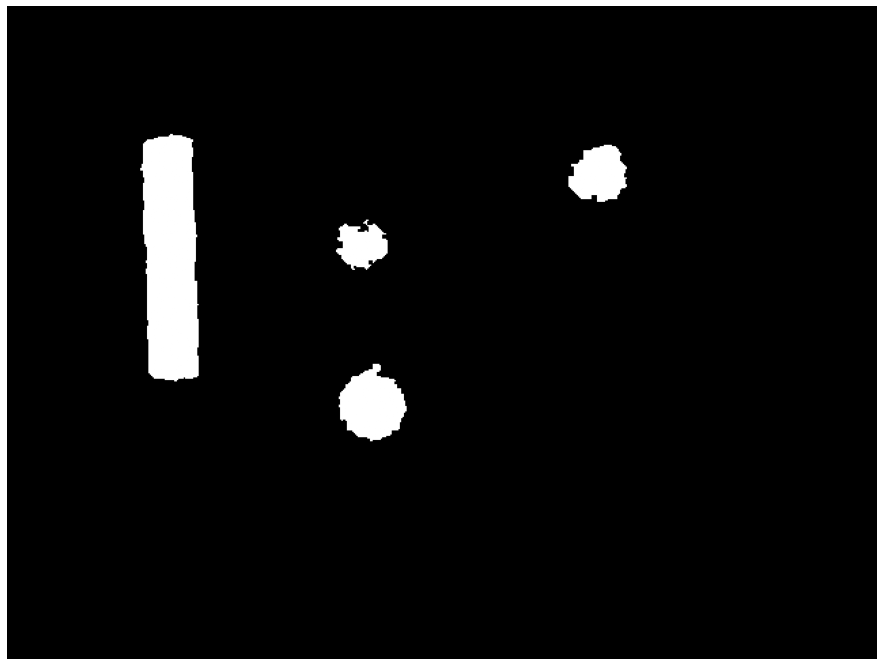

In [16]:
# contour_drawn, count, contours = find_contours(img_seg_norm, min_area=800, max_area=2000, fill=True, external=True) ###
contour_drawn, count, contours = find_contours(img_seg_norm, min_area=800, max_area=20000, fill=True, external=True) ###
print(f"Počet nalezených kontur: {count}")
plot_images(contour_drawn)

1835.0 0.6639042195822296
Kontura 0: Plocha = 1835.00, Obvod = 186.37, Kulatost = 0.6639, Přijímáme = ANO
832.5 0.556653585381271
Kontura 1: Plocha = 832.50, Obvod = 171.27, Kulatost = 0.5567, Přijímáme = ANO
1248.5 0.6631665107259167
Kontura 2: Plocha = 1248.50, Obvod = 153.81, Kulatost = 0.6632, Přijímáme = ANO
6343.5 0.4178398444944354
Kontura 3: Plocha = 6343.50, Obvod = 436.78, Kulatost = 0.4178, Přijímáme = NE


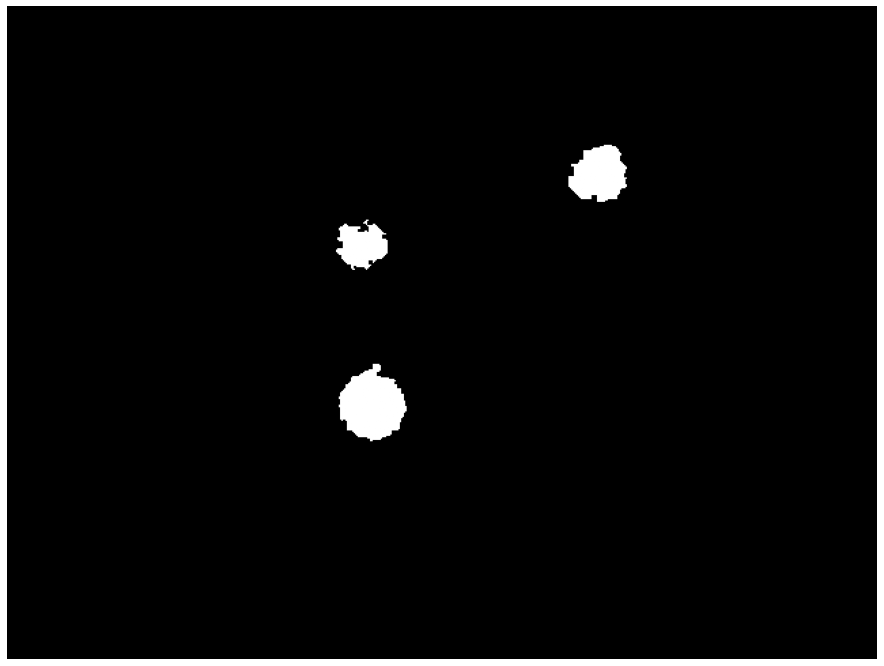

In [17]:
import math

filtered_image = np.zeros_like(contour_drawn)  # prázdný obraz pro zápis přijatých kontur
passed_contours = []

# Filtrování kontur na základě jejich kulatosti
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)       # obsah kontury
#     r = math.sqrt(area / math.pi)
#     perimeter = 2 * math.pi * r # obvod kontury
    perimeter = cv2.arcLength(contour, False)

    circularity = 4 * math.pi * area / (perimeter**2) # porovnání kulatosti kontury a ideálního kruhu

    
    accept = "NE" # flag pro výpis
    print(area, circularity)
    if 0.5 < circularity < 1: # doplňte vhodné hodnoty pro odfiltrování nekulatých objektů 
       
        accept = "ANO"
        passed_contours.append(contour)
        
    
    print(f"Kontura {i}: Plocha = {area:.2f}, Obvod = {perimeter:.2f}, Kulatost = {circularity:.4f}, Přijímáme = {accept}")

cv2.drawContours(filtered_image, passed_contours, -1, 255, -1) # vykreslení všech přijatých kontur do jednoho obrazu   
plot_images(filtered_image)

---

#### 5) Slučte hloubkovou informaci s maskou vyfiltrovaných jablek
OpenCV obsahuje vhodnou funkci pro logické sloučení dvou obrazů. Výsledek vizualizujte pomocí vhodné colormapy.

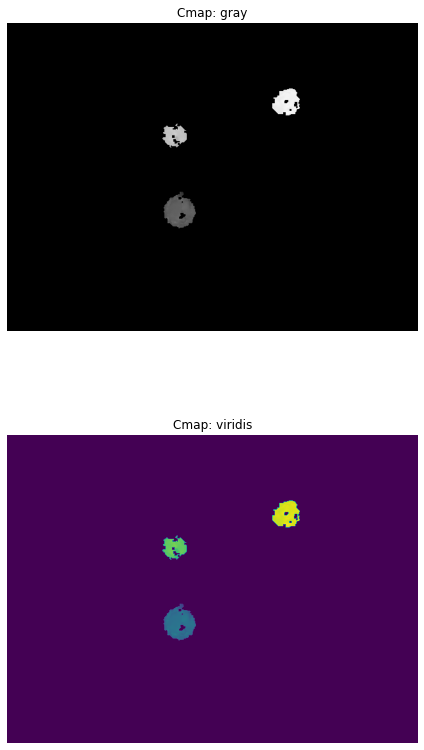

In [12]:
ball_depth = cv2.bitwise_and(depths_normalized,contour_drawn) #
subplot_image(ball_depth, subplots=(2,1), cmaps=['gray', 'viridis', 'plasma', 'inferno'])

---

#### 6) Nalezněte koule, které jsou nejdále a nejblíže od kamery

##### a) Vizualizujte indexy přijatých kontur (koulí) na hloubkovém obrazu z předchozího kroku

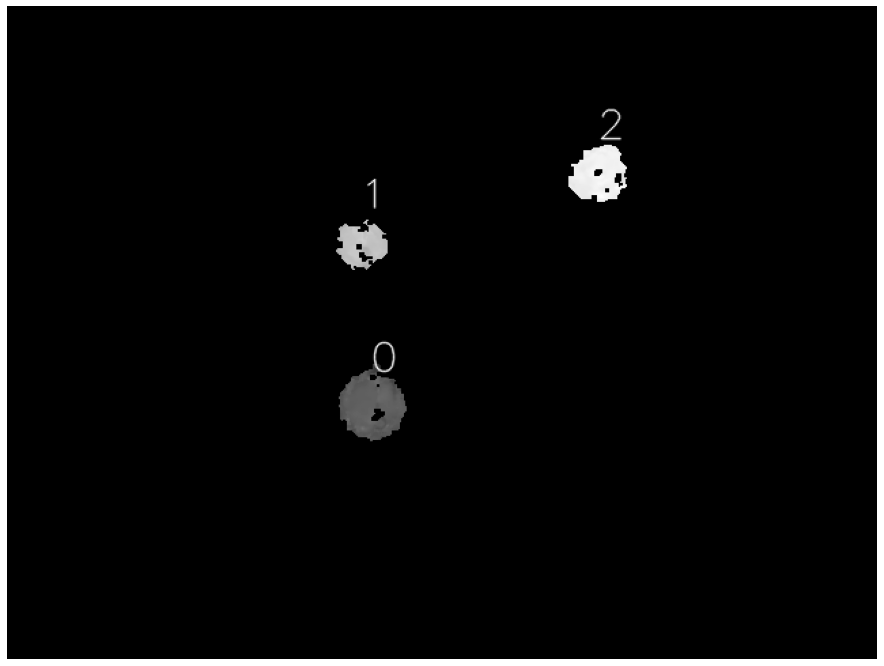

In [13]:
number_contours_img = ball_depth.copy()
for i, contour in enumerate(contours):
    center, size, _ = cv2.minAreaRect(contour) # vhodná funkce cv2 na obdélníkové ohraničení kontury
    x, y = center
    w, h = size
    x, y = int(x), int(y)
    number_contours_img = cv2.putText(number_contours_img, str(i) , (x, y-25), cv2.FONT_HERSHEY_SIMPLEX, 1, 255, 1, cv2.LINE_AA)
 
plot_images(number_contours_img) ###

##### b) Vypište index koule visící nejblíže a nejdále od kamery
Nezapomeňte správně pracovat s NaN hodnotami.

In [14]:
ball_depth

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
results = []

for contour in contours:
    
    contour_mask = np.zeros(contour_drawn.shape, dtype=np.uint8) # příprava masky pro aplikaci na originální data
#     cv.drawContours(image, contours, contourIdx, color[, thickness[]]])
    contour_mask = cv2.drawContours(contour_mask, [contour], -1, 255, -1) # vykreslení kontury do masky
    
    ... ### aplikace masky, výběr nejbližšího bodu a uložení
    d = cv2.bitwise_and(depths_normalized, contour_mask) #
    d[d==0] = 255
    results.append(d.min())

    
min_depth_index = np.argmin(results)
max_depth_index = np.argmax(results)

print('Nejblíže ke kameře je koule:  č.{}'.format(max_depth_index))
print('Nejdál ke kameře je koule:  č.{}'.format(min_depth_index))
    

Nejblíže ke kameře je koule:  č.2
Nejdál ke kameře je koule:  č.0
